In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

plt.rcParams['svg.fonttype'] = 'none'

framer = pd.DataFrame()

In [2]:
plasmadata = "/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/flux/sepsis_fluxomics/Plasma_summary.xlsx"
tissuedata = "/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/flux/sepsis_fluxomics/Tissue_summary.xlsx"

plasmapoolsize = pd.read_excel(plasmadata, sheet_name=3, header=0)
plasmanormalizedlabeling = pd.read_excel(plasmadata, sheet_name=2, header=0)

tissuepoolsize = pd.read_excel(tissuedata, sheet_name=3, header=0)
tissuenormalizedlabeling = pd.read_excel(tissuedata, sheet_name=2, header=0)

In [3]:
#Convert float to INT to do math on dataframe
tissuepoolsize1 = tissuepoolsize.set_index('Compound')
tissuepoolsize = tissuepoolsize1.astype(int)

plasmapoolsize1 = plasmapoolsize.set_index('Compound')
plasmapoolsize = plasmapoolsize1.astype(int)

In [4]:
#Pandas automatically does this normalization on a per column basis

#Sample Normalization with fraction of sum of total peak area
tissuepoolsize_nml = tissuepoolsize / tissuepoolsize.sum()
plasmapoolsize_nml = plasmapoolsize / plasmapoolsize.sum()

#Feature Normalization with log transform
tissuepoolsize_nml = np.log2(tissuepoolsize_nml)

#Transpose the dataframe to add info regarding exercise status
tissuepoolsize_nml_t = tissuepoolsize_nml.transpose()

In [5]:
#Add a column that gives each mouse's exercise vs sedentary condition
tissuepoolsize_nml_t["Condition"] = 'test'
tissuepoolsize_nml_t["Condition"][tissuepoolsize_nml_t.index.str.contains('1|3|5|7|9|11|13|15')] = "Sepsis"
tissuepoolsize_nml_t["Condition"][tissuepoolsize_nml_t.index.str.contains('2|4|6|8|10|12|14|16')] = "Sham"

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/1094772515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tissuepoolsize_nml_t["Condition"][tissuepoolsize_nml_t.index.str.contains('1|3|5|7|9|11|13|15')] = "Sepsis"
/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/1094772515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tissuepoolsize_nml_t["Condition"][tissuepoolsize_nml_t.index.str.contains('2|4|6|8|10|12|14|16')] = "Sham"


In [6]:
sepsis_tissue_pool = tissuepoolsize_nml_t[tissuepoolsize_nml_t['Condition'] == 'Sepsis']
sham_tissue_pool = tissuepoolsize_nml_t[tissuepoolsize_nml_t['Condition'] == 'Sham']

In [7]:
tissues = ['eWAT', 'Heart', 'Kidney', 'Liver', 'Lung', 'Quad', 'Spleen']

sepsis_tissue_pool['Tissue'] = tissues * int(len(sepsis_tissue_pool['Condition']) / 7)
sham_tissue_pool['Tissue'] = tissues * int(len(sham_tissue_pool['Condition']) / 7)

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/1859778861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sepsis_tissue_pool['Tissue'] = tissues * int(len(sepsis_tissue_pool['Condition']) / 7)
/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/1859778861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sham_tissue_pool['Tissue'] = tissues * int(len(sham_tissue_pool['Condition']) / 7)


In [8]:
eWAT_sepsis_df = sepsis_tissue_pool[sepsis_tissue_pool['Tissue'] == str(tissues[0])].iloc[:, :-2].transpose()
Heart_sepsis_df = sepsis_tissue_pool[sepsis_tissue_pool['Tissue'] == str(tissues[1])].iloc[:, :-2].transpose()
Kidney_sepsis_df = sepsis_tissue_pool[sepsis_tissue_pool['Tissue'] == str(tissues[2])].iloc[:, :-2].transpose()
Liver_sepsis_df = sepsis_tissue_pool[sepsis_tissue_pool['Tissue'] == str(tissues[3])].iloc[:, :-2].transpose()
Lung_sepsis_df = sepsis_tissue_pool[sepsis_tissue_pool['Tissue'] == str(tissues[4])].iloc[:, :-2].transpose()
Quad_sepsis_df = sepsis_tissue_pool[sepsis_tissue_pool['Tissue'] == str(tissues[5])].iloc[:, :-2].transpose()
Spleen_sepsis_df = sepsis_tissue_pool[sepsis_tissue_pool['Tissue'] == str(tissues[6])].iloc[:, :-2].transpose()

In [9]:
#Get list of metabolites from any of the dataframes

metabolites = eWAT_sepsis_df.index.tolist()

In [10]:
#Obtain values from each dataframe to run statistics

wat_vals = eWAT_sepsis_df.values.tolist()
heart_vals = Heart_sepsis_df.values.tolist()
kidney_vals = Kidney_sepsis_df.values.tolist()
liver_vals = Liver_sepsis_df.values.tolist()
lung_vals = Lung_sepsis_df.values.tolist()
quad_vals = Quad_sepsis_df.values.tolist()
spleen_vals = Spleen_sepsis_df.values.tolist()

21 Comparisons

WAT vs. Heart

In [21]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, wat_vals, heart_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

wat_v_heart = framer.append(metabolites)
wat_v_heart['SpearmanR'] = SpearmanR
wat_v_heart['p'] = ps

wat_v_heart = wat_v_heart.sort_values('p')
wat_v_heart_sig = wat_v_heart[wat_v_heart['p'] < 0.05]
wat_v_heart_sig['Tissue_Interaction'] = 'wat_v_heart'


/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/870657794.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wat_v_heart_sig['Tissue_Interaction'] = 'wat_v_heart'


WAT vs Kidney

In [23]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, wat_vals, kidney_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

wat_v_kidney = framer.append(metabolites)
wat_v_kidney['SpearmanR'] = SpearmanR
wat_v_kidney['p'] = ps
wat_v_kidney = wat_v_kidney.sort_values('p')
wat_v_kidney_sig = wat_v_kidney[wat_v_kidney['p'] < 0.05]
wat_v_kidney_sig['Tissue_Interaction'] = 'wat_v_kidney'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/473348795.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wat_v_kidney_sig['Tissue_Interaction'] = 'wat_v_kidney'


wat vs liver

In [27]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, wat_vals, liver_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

wat_v_liver = framer.append(metabolites)
wat_v_liver['SpearmanR'] = SpearmanR
wat_v_liver['p'] = ps
wat_v_liver = wat_v_liver.sort_values('p')
wat_v_liver_sig = wat_v_liver[wat_v_liver['p'] < 0.05]
wat_v_liver_sig['Tissue_Interaction'] = 'wat_v_liver'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/2326900675.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wat_v_liver_sig['Tissue_Interaction'] = 'wat_v_liver'


wat vs lung

In [28]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, wat_vals, lung_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

wat_v_lung = framer.append(metabolites)
wat_v_lung['SpearmanR'] = SpearmanR
wat_v_lung['p'] = ps
wat_v_lung = wat_v_lung.sort_values('p')
wat_v_lung_sig = wat_v_lung[wat_v_lung['p'] < 0.05]
wat_v_lung_sig['Tissue_Interaction'] = 'wat_v_lung'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/1309243148.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wat_v_lung_sig['Tissue_Interaction'] = 'wat_v_lung'


wat vs quad

In [29]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, wat_vals, quad_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

wat_v_quad = framer.append(metabolites)
wat_v_quad['SpearmanR'] = SpearmanR
wat_v_quad['p'] = ps
wat_v_quad = wat_v_quad.sort_values('p')
wat_v_quad_sig = wat_v_quad[wat_v_quad['p'] < 0.05]
wat_v_quad_sig['Tissue_Interaction'] = 'wat_v_quad'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/2371657360.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wat_v_quad_sig['Tissue_Interaction'] = 'wat_v_quad'


wat vs spleen

In [30]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, wat_vals, spleen_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

wat_v_spleen = framer.append(metabolites)
wat_v_spleen['SpearmanR'] = SpearmanR
wat_v_spleen['p'] = ps
wat_v_spleen = wat_v_spleen.sort_values('p')
wat_v_spleen_sig = wat_v_spleen[wat_v_spleen['p'] < 0.05]
wat_v_spleen_sig['Tissue_Interaction'] = 'wat_v_spleen'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/2848441415.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wat_v_spleen_sig['Tissue_Interaction'] = 'wat_v_spleen'


heart vs kidney

In [31]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, heart_vals, kidney_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

heart_v_kidney = framer.append(metabolites)
heart_v_kidney['SpearmanR'] = SpearmanR
heart_v_kidney['p'] = ps
heart_v_kidney = heart_v_kidney.sort_values('p')
heart_v_kidney_sig = heart_v_kidney[heart_v_kidney['p'] < 0.05]
heart_v_kidney_sig['Tissue_Interaction'] = 'heart_v_kidney'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/3643927312.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_v_kidney_sig['Tissue_Interaction'] = 'heart_v_kidney'


heart vs liver

In [32]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, heart_vals, liver_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

heart_v_liver = framer.append(metabolites)
heart_v_liver['SpearmanR'] = SpearmanR
heart_v_liver['p'] = ps
heart_v_liver = heart_v_liver.sort_values('p')
heart_v_liver_sig = heart_v_liver[heart_v_liver['p'] < 0.05]
heart_v_liver_sig['Tissue_Interaction'] = 'heart_v_liver'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/869855609.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_v_liver_sig['Tissue_Interaction'] = 'heart_v_liver'


heart vs lung

In [33]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, heart_vals, lung_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

heart_v_lung = framer.append(metabolites)
heart_v_lung['SpearmanR'] = SpearmanR
heart_v_lung['p'] = ps
heart_v_lung = heart_v_lung.sort_values('p')
heart_v_lung_sig = heart_v_lung[heart_v_lung['p'] < 0.05]
heart_v_lung_sig['Tissue_Interaction'] = 'heart_v_lung'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/3891727752.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_v_lung_sig['Tissue_Interaction'] = 'heart_v_lung'


heart vs quad

In [34]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, heart_vals, quad_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

heart_v_quad = framer.append(metabolites)
heart_v_quad['SpearmanR'] = SpearmanR
heart_v_quad['p'] = ps
heart_v_quad = heart_v_quad.sort_values('p')
heart_v_quad_sig = heart_v_quad[heart_v_quad['p'] < 0.05]
heart_v_quad_sig['Tissue_Interaction'] = 'heart_v_quad'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/633119832.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_v_quad_sig['Tissue_Interaction'] = 'heart_v_quad'


heart vs spleen

In [35]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, heart_vals, spleen_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

heart_v_spleen = framer.append(metabolites)
heart_v_spleen['SpearmanR'] = SpearmanR
heart_v_spleen['p'] = ps
heart_v_spleen = heart_v_spleen.sort_values('p')
heart_v_spleen_sig = heart_v_spleen[heart_v_spleen['p'] < 0.05]
heart_v_spleen_sig['Tissue_Interaction'] = 'heart_v_spleen'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/1919823672.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_v_spleen_sig['Tissue_Interaction'] = 'heart_v_spleen'


kidney vs liver

In [36]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, kidney_vals, liver_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

kidney_v_liver = framer.append(metabolites)
kidney_v_liver['SpearmanR'] = SpearmanR
kidney_v_liver['p'] = ps
kidney_v_liver = kidney_v_liver.sort_values('p')
kidney_v_liver_sig = kidney_v_liver[kidney_v_liver['p'] < 0.05]
kidney_v_liver_sig['Tissue_Interaction'] = 'kidney_v_liver'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/2633811498.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney_v_liver_sig['Tissue_Interaction'] = 'kidney_v_liver'


kidney vs lung

In [37]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, kidney_vals, lung_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

kidney_v_lung = framer.append(metabolites)
kidney_v_lung['SpearmanR'] = SpearmanR
kidney_v_lung['p'] = ps
kidney_v_lung = kidney_v_lung.sort_values('p')
kidney_v_lung_sig = kidney_v_lung[kidney_v_lung['p'] < 0.05]
kidney_v_lung_sig['Tissue_Interaction'] = 'kidney_v_lung'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/1660952768.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney_v_lung_sig['Tissue_Interaction'] = 'kidney_v_lung'


kidney vs quad

In [38]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, kidney_vals, quad_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

kidney_v_quad = framer.append(metabolites)
kidney_v_quad['SpearmanR'] = SpearmanR
kidney_v_quad['p'] = ps
kidney_v_quad = kidney_v_quad.sort_values('p')
kidney_v_quad_sig = kidney_v_quad[kidney_v_quad['p'] < 0.05]
kidney_v_quad_sig['Tissue_Interaction'] = 'kidney_v_quad'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/469064408.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney_v_quad_sig['Tissue_Interaction'] = 'kidney_v_quad'


kidney vs spleen

In [39]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, kidney_vals, spleen_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

kidney_v_spleen = framer.append(metabolites)
kidney_v_spleen['SpearmanR'] = SpearmanR
kidney_v_spleen['p'] = ps
kidney_v_spleen = kidney_v_spleen.sort_values('p')
kidney_v_spleen_sig = kidney_v_spleen[kidney_v_spleen['p'] < 0.05]
kidney_v_spleen_sig['Tissue_Interaction'] = 'kidney_v_spleen'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/4205852332.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney_v_spleen_sig['Tissue_Interaction'] = 'kidney_v_spleen'


liver vs lung

In [40]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, liver_vals, lung_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

liver_v_lung = framer.append(metabolites)
liver_v_lung['SpearmanR'] = SpearmanR
liver_v_lung['p'] = ps
liver_v_lung = liver_v_lung.sort_values('p')
liver_v_lung_sig = liver_v_lung[liver_v_lung['p'] < 0.05]
liver_v_lung_sig['Tissue_Interaction'] = 'liver_v_lung'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/3550170202.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_v_lung_sig['Tissue_Interaction'] = 'liver_v_lung'


liver vs quad

In [41]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, liver_vals, quad_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

liver_v_quad = framer.append(metabolites)
liver_v_quad['SpearmanR'] = SpearmanR
liver_v_quad['p'] = ps
liver_v_quad = liver_v_quad.sort_values('p')
liver_v_quad_sig = liver_v_quad[liver_v_quad['p'] < 0.05]
liver_v_quad_sig['Tissue_Interaction'] = 'liver_v_quad'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/3680036043.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_v_quad_sig['Tissue_Interaction'] = 'liver_v_quad'


liver vs spleen

In [42]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, liver_vals, spleen_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

liver_v_spleen = framer.append(metabolites)
liver_v_spleen['SpearmanR'] = SpearmanR
liver_v_spleen['p'] = ps
liver_v_spleen = liver_v_spleen.sort_values('p')
liver_v_spleen_sig = liver_v_spleen[liver_v_spleen['p'] < 0.05]
liver_v_spleen_sig['Tissue_Interaction'] = 'liver_v_spleen'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/669767389.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_v_spleen_sig['Tissue_Interaction'] = 'liver_v_spleen'


lung vs quad

In [43]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, lung_vals, quad_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

lung_v_quad = framer.append(metabolites)
lung_v_quad['SpearmanR'] = SpearmanR
lung_v_quad['p'] = ps
lung_v_quad = lung_v_quad.sort_values('p')
lung_v_quad_sig = lung_v_quad[lung_v_quad['p'] < 0.05]
lung_v_quad_sig['Tissue_Interaction'] = 'lung_v_quad'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/2824660445.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_v_quad_sig['Tissue_Interaction'] = 'lung_v_quad'


lung vs spleen

In [44]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, lung_vals, spleen_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

lung_v_spleen = framer.append(metabolites)
lung_v_spleen['SpearmanR'] = SpearmanR
lung_v_spleen['p'] = ps
lung_v_spleen = lung_v_spleen.sort_values('p')
lung_v_spleen_sig = lung_v_spleen[lung_v_spleen['p'] < 0.05]
lung_v_spleen_sig['Tissue_Interaction'] = 'lung_v_spleen'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/2380173895.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_v_spleen_sig['Tissue_Interaction'] = 'lung_v_spleen'


quad vs spleen

In [45]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, quad_vals, spleen_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

quad_v_spleen = framer.append(metabolites)
quad_v_spleen['SpearmanR'] = SpearmanR
quad_v_spleen['p'] = ps
quad_v_spleen = quad_v_spleen.sort_values('p')
quad_v_spleen_sig = quad_v_spleen[quad_v_spleen['p'] < 0.05]
quad_v_spleen_sig['Tissue_Interaction'] = 'quad_v_spleen'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/1957829768.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quad_v_spleen_sig['Tissue_Interaction'] = 'quad_v_spleen'


In [46]:
masterinteractions_CLP = pd.concat([wat_v_heart_sig, wat_v_kidney_sig, wat_v_liver_sig, wat_v_lung_sig, wat_v_quad_sig, wat_v_spleen_sig, heart_v_kidney_sig, heart_v_liver_sig, heart_v_lung_sig, heart_v_quad_sig, heart_v_spleen_sig, kidney_v_liver_sig, kidney_v_lung_sig, kidney_v_quad_sig, kidney_v_spleen_sig, liver_v_lung_sig, liver_v_quad_sig, liver_v_spleen_sig, lung_v_quad_sig, lung_v_spleen_sig, quad_v_spleen_sig])
masterinteractions_CLP

,0,SpearmanR,p,Tissue_Interaction
34,leucine,1.000000,0.000000,wat_v_heart
48,proline,0.942857,0.004805,wat_v_heart
45,serine,0.942857,0.004805,wat_v_heart
44,alanine,0.942857,0.004805,wat_v_heart
10,ribose-5-phosphate,0.942857,0.004805,wat_v_heart
...,...,...,...,...
40,phenylalanine,0.942857,0.004805,quad_v_spleen
49,glutathione disulfide (GSSG),-0.942857,0.004805,quad_v_spleen
7,lactate,0.828571,0.041563,quad_v_spleen
46,glycine,0.828571,0.041563,quad_v_spleen


Making a csv file for import into R Jupyter notebook to run Chord plot
Will use spearman p value cutoff of 0.05

Columns: TissueA | Tissue B | Negative Corr | Positive Corr | Total Corrs


# Same Analysis for Sham

In [52]:
eWAT_sham_df = sham_tissue_pool[sham_tissue_pool['Tissue'] == str(tissues[0])].iloc[:, :-2].transpose()
Heart_sham_df = sham_tissue_pool[sham_tissue_pool['Tissue'] == str(tissues[1])].iloc[:, :-2].transpose()
Kidney_sham_df = sham_tissue_pool[sham_tissue_pool['Tissue'] == str(tissues[2])].iloc[:, :-2].transpose()
Liver_sham_df = sham_tissue_pool[sham_tissue_pool['Tissue'] == str(tissues[3])].iloc[:, :-2].transpose()
Lung_sham_df = sham_tissue_pool[sham_tissue_pool['Tissue'] == str(tissues[4])].iloc[:, :-2].transpose()
Quad_sham_df = sham_tissue_pool[sham_tissue_pool['Tissue'] == str(tissues[5])].iloc[:, :-2].transpose()
Spleen_sham_df = sham_tissue_pool[sham_tissue_pool['Tissue'] == str(tissues[6])].iloc[:, :-2].transpose()

In [53]:
#Get list of metabolites from any of the dataframes

metabolites = eWAT_sham_df.index.tolist()

In [54]:
#Obtain values from each dataframe to run statistics

wat_vals = eWAT_sham_df.values.tolist()
heart_vals = Heart_sham_df.values.tolist()
kidney_vals = Kidney_sham_df.values.tolist()
liver_vals = Liver_sham_df.values.tolist()
lung_vals = Lung_sham_df.values.tolist()
quad_vals = Quad_sham_df.values.tolist()
spleen_vals = Spleen_sham_df.values.tolist()

21 Comparisons

WAT vs. Heart

In [55]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, wat_vals, heart_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

wat_v_heart = framer.append(metabolites)
wat_v_heart['SpearmanR'] = SpearmanR
wat_v_heart['p'] = ps

wat_v_heart = wat_v_heart.sort_values('p')
wat_v_heart_sig = wat_v_heart[wat_v_heart['p'] < 0.05]
wat_v_heart_sig['Tissue_Interaction'] = 'wat_v_heart'


/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/870657794.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wat_v_heart_sig['Tissue_Interaction'] = 'wat_v_heart'


WAT vs Kidney

In [56]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, wat_vals, kidney_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

wat_v_kidney = framer.append(metabolites)
wat_v_kidney['SpearmanR'] = SpearmanR
wat_v_kidney['p'] = ps
wat_v_kidney = wat_v_kidney.sort_values('p')
wat_v_kidney_sig = wat_v_kidney[wat_v_kidney['p'] < 0.05]
wat_v_kidney_sig['Tissue_Interaction'] = 'wat_v_kidney'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/473348795.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wat_v_kidney_sig['Tissue_Interaction'] = 'wat_v_kidney'


wat vs liver

In [57]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, wat_vals, liver_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

wat_v_liver = framer.append(metabolites)
wat_v_liver['SpearmanR'] = SpearmanR
wat_v_liver['p'] = ps
wat_v_liver = wat_v_liver.sort_values('p')
wat_v_liver_sig = wat_v_liver[wat_v_liver['p'] < 0.05]
wat_v_liver_sig['Tissue_Interaction'] = 'wat_v_liver'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/2326900675.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wat_v_liver_sig['Tissue_Interaction'] = 'wat_v_liver'


wat vs lung

In [58]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, wat_vals, lung_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

wat_v_lung = framer.append(metabolites)
wat_v_lung['SpearmanR'] = SpearmanR
wat_v_lung['p'] = ps
wat_v_lung = wat_v_lung.sort_values('p')
wat_v_lung_sig = wat_v_lung[wat_v_lung['p'] < 0.05]
wat_v_lung_sig['Tissue_Interaction'] = 'wat_v_lung'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/1309243148.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wat_v_lung_sig['Tissue_Interaction'] = 'wat_v_lung'


wat vs quad

In [59]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, wat_vals, quad_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

wat_v_quad = framer.append(metabolites)
wat_v_quad['SpearmanR'] = SpearmanR
wat_v_quad['p'] = ps
wat_v_quad = wat_v_quad.sort_values('p')
wat_v_quad_sig = wat_v_quad[wat_v_quad['p'] < 0.05]
wat_v_quad_sig['Tissue_Interaction'] = 'wat_v_quad'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/2371657360.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wat_v_quad_sig['Tissue_Interaction'] = 'wat_v_quad'


wat vs spleen

In [60]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, wat_vals, spleen_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

wat_v_spleen = framer.append(metabolites)
wat_v_spleen['SpearmanR'] = SpearmanR
wat_v_spleen['p'] = ps
wat_v_spleen = wat_v_spleen.sort_values('p')
wat_v_spleen_sig = wat_v_spleen[wat_v_spleen['p'] < 0.05]
wat_v_spleen_sig['Tissue_Interaction'] = 'wat_v_spleen'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/2848441415.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wat_v_spleen_sig['Tissue_Interaction'] = 'wat_v_spleen'


heart vs kidney

In [61]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, heart_vals, kidney_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

heart_v_kidney = framer.append(metabolites)
heart_v_kidney['SpearmanR'] = SpearmanR
heart_v_kidney['p'] = ps
heart_v_kidney = heart_v_kidney.sort_values('p')
heart_v_kidney_sig = heart_v_kidney[heart_v_kidney['p'] < 0.05]
heart_v_kidney_sig['Tissue_Interaction'] = 'heart_v_kidney'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/3643927312.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_v_kidney_sig['Tissue_Interaction'] = 'heart_v_kidney'


heart vs liver

In [62]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, heart_vals, liver_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

heart_v_liver = framer.append(metabolites)
heart_v_liver['SpearmanR'] = SpearmanR
heart_v_liver['p'] = ps
heart_v_liver = heart_v_liver.sort_values('p')
heart_v_liver_sig = heart_v_liver[heart_v_liver['p'] < 0.05]
heart_v_liver_sig['Tissue_Interaction'] = 'heart_v_liver'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/869855609.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_v_liver_sig['Tissue_Interaction'] = 'heart_v_liver'


heart vs lung

In [63]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, heart_vals, lung_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

heart_v_lung = framer.append(metabolites)
heart_v_lung['SpearmanR'] = SpearmanR
heart_v_lung['p'] = ps
heart_v_lung = heart_v_lung.sort_values('p')
heart_v_lung_sig = heart_v_lung[heart_v_lung['p'] < 0.05]
heart_v_lung_sig['Tissue_Interaction'] = 'heart_v_lung'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/3891727752.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_v_lung_sig['Tissue_Interaction'] = 'heart_v_lung'


heart vs quad

In [64]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, heart_vals, quad_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

heart_v_quad = framer.append(metabolites)
heart_v_quad['SpearmanR'] = SpearmanR
heart_v_quad['p'] = ps
heart_v_quad = heart_v_quad.sort_values('p')
heart_v_quad_sig = heart_v_quad[heart_v_quad['p'] < 0.05]
heart_v_quad_sig['Tissue_Interaction'] = 'heart_v_quad'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/633119832.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_v_quad_sig['Tissue_Interaction'] = 'heart_v_quad'


heart vs spleen

In [65]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, heart_vals, spleen_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

heart_v_spleen = framer.append(metabolites)
heart_v_spleen['SpearmanR'] = SpearmanR
heart_v_spleen['p'] = ps
heart_v_spleen = heart_v_spleen.sort_values('p')
heart_v_spleen_sig = heart_v_spleen[heart_v_spleen['p'] < 0.05]
heart_v_spleen_sig['Tissue_Interaction'] = 'heart_v_spleen'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/1919823672.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_v_spleen_sig['Tissue_Interaction'] = 'heart_v_spleen'


kidney vs liver

In [66]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, kidney_vals, liver_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

kidney_v_liver = framer.append(metabolites)
kidney_v_liver['SpearmanR'] = SpearmanR
kidney_v_liver['p'] = ps
kidney_v_liver = kidney_v_liver.sort_values('p')
kidney_v_liver_sig = kidney_v_liver[kidney_v_liver['p'] < 0.05]
kidney_v_liver_sig['Tissue_Interaction'] = 'kidney_v_liver'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/2633811498.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney_v_liver_sig['Tissue_Interaction'] = 'kidney_v_liver'


kidney vs lung

In [67]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, kidney_vals, lung_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

kidney_v_lung = framer.append(metabolites)
kidney_v_lung['SpearmanR'] = SpearmanR
kidney_v_lung['p'] = ps
kidney_v_lung = kidney_v_lung.sort_values('p')
kidney_v_lung_sig = kidney_v_lung[kidney_v_lung['p'] < 0.05]
kidney_v_lung_sig['Tissue_Interaction'] = 'kidney_v_lung'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/1660952768.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney_v_lung_sig['Tissue_Interaction'] = 'kidney_v_lung'


kidney vs quad

In [68]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, kidney_vals, quad_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

kidney_v_quad = framer.append(metabolites)
kidney_v_quad['SpearmanR'] = SpearmanR
kidney_v_quad['p'] = ps
kidney_v_quad = kidney_v_quad.sort_values('p')
kidney_v_quad_sig = kidney_v_quad[kidney_v_quad['p'] < 0.05]
kidney_v_quad_sig['Tissue_Interaction'] = 'kidney_v_quad'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/469064408.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney_v_quad_sig['Tissue_Interaction'] = 'kidney_v_quad'


kidney vs spleen

In [69]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, kidney_vals, spleen_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

kidney_v_spleen = framer.append(metabolites)
kidney_v_spleen['SpearmanR'] = SpearmanR
kidney_v_spleen['p'] = ps
kidney_v_spleen = kidney_v_spleen.sort_values('p')
kidney_v_spleen_sig = kidney_v_spleen[kidney_v_spleen['p'] < 0.05]
kidney_v_spleen_sig['Tissue_Interaction'] = 'kidney_v_spleen'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/4205852332.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney_v_spleen_sig['Tissue_Interaction'] = 'kidney_v_spleen'


liver vs lung

In [70]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, liver_vals, lung_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

liver_v_lung = framer.append(metabolites)
liver_v_lung['SpearmanR'] = SpearmanR
liver_v_lung['p'] = ps
liver_v_lung = liver_v_lung.sort_values('p')
liver_v_lung_sig = liver_v_lung[liver_v_lung['p'] < 0.05]
liver_v_lung_sig['Tissue_Interaction'] = 'liver_v_lung'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/3550170202.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_v_lung_sig['Tissue_Interaction'] = 'liver_v_lung'


liver vs quad

In [71]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, liver_vals, quad_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

liver_v_quad = framer.append(metabolites)
liver_v_quad['SpearmanR'] = SpearmanR
liver_v_quad['p'] = ps
liver_v_quad = liver_v_quad.sort_values('p')
liver_v_quad_sig = liver_v_quad[liver_v_quad['p'] < 0.05]
liver_v_quad_sig['Tissue_Interaction'] = 'liver_v_quad'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/3680036043.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_v_quad_sig['Tissue_Interaction'] = 'liver_v_quad'


liver vs spleen

In [72]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, liver_vals, spleen_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

liver_v_spleen = framer.append(metabolites)
liver_v_spleen['SpearmanR'] = SpearmanR
liver_v_spleen['p'] = ps
liver_v_spleen = liver_v_spleen.sort_values('p')
liver_v_spleen_sig = liver_v_spleen[liver_v_spleen['p'] < 0.05]
liver_v_spleen_sig['Tissue_Interaction'] = 'liver_v_spleen'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/669767389.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_v_spleen_sig['Tissue_Interaction'] = 'liver_v_spleen'


lung vs quad

In [73]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, lung_vals, quad_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

lung_v_quad = framer.append(metabolites)
lung_v_quad['SpearmanR'] = SpearmanR
lung_v_quad['p'] = ps
lung_v_quad = lung_v_quad.sort_values('p')
lung_v_quad_sig = lung_v_quad[lung_v_quad['p'] < 0.05]
lung_v_quad_sig['Tissue_Interaction'] = 'lung_v_quad'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/2824660445.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_v_quad_sig['Tissue_Interaction'] = 'lung_v_quad'


lung vs spleen

In [74]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, lung_vals, spleen_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

lung_v_spleen = framer.append(metabolites)
lung_v_spleen['SpearmanR'] = SpearmanR
lung_v_spleen['p'] = ps
lung_v_spleen = lung_v_spleen.sort_values('p')
lung_v_spleen_sig = lung_v_spleen[lung_v_spleen['p'] < 0.05]
lung_v_spleen_sig['Tissue_Interaction'] = 'lung_v_spleen'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/2380173895.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_v_spleen_sig['Tissue_Interaction'] = 'lung_v_spleen'


quad vs spleen

In [75]:
#Generate Spearman R and P Values for intertissue metabolites for all tissue interaction

ps = []
SpearmanR = []

for x, y, z in zip(metabolites, quad_vals, spleen_vals):
    SpearmanR.append(scipy.stats.spearmanr(y, z)[0])
    ps.append(scipy.stats.spearmanr(y, z)[1])

quad_v_spleen = framer.append(metabolites)
quad_v_spleen['SpearmanR'] = SpearmanR
quad_v_spleen['p'] = ps
quad_v_spleen = quad_v_spleen.sort_values('p')
quad_v_spleen_sig = quad_v_spleen[quad_v_spleen['p'] < 0.05]
quad_v_spleen_sig['Tissue_Interaction'] = 'quad_v_spleen'

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_93964/1957829768.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quad_v_spleen_sig['Tissue_Interaction'] = 'quad_v_spleen'


In [76]:
masterinteractions_sham = pd.concat([wat_v_heart_sig, wat_v_kidney_sig, wat_v_liver_sig, wat_v_lung_sig, wat_v_quad_sig, wat_v_spleen_sig, heart_v_kidney_sig, heart_v_liver_sig, heart_v_lung_sig, heart_v_quad_sig, heart_v_spleen_sig, kidney_v_liver_sig, kidney_v_lung_sig, kidney_v_quad_sig, kidney_v_spleen_sig, liver_v_lung_sig, liver_v_quad_sig, liver_v_spleen_sig, lung_v_quad_sig, lung_v_spleen_sig, quad_v_spleen_sig])
masterinteractions_sham

,0,SpearmanR,p,Tissue_Interaction
46,glycine,0.833333,0.010176,wat_v_heart
4,3-phosphoglycerate,-0.738095,0.036553,wat_v_heart
12,Glyceraldehyde-3-phosphate,0.833333,0.010176,wat_v_kidney
29,valine,0.761905,0.028005,wat_v_kidney
24,2-keto-isocaproate,0.714286,0.046528,wat_v_kidney
...,...,...,...,...
33,S-Adenosylmethionine,0.976190,0.000033,quad_v_spleen
24,2-keto-isocaproate,0.976190,0.000033,quad_v_spleen
55,NAD,-0.928571,0.000863,quad_v_spleen
49,glutathione disulfide (GSSG),-0.809524,0.014903,quad_v_spleen


In [77]:
masterinteractions_sham.to_csv('/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/metabolomics/all_tissue_interactions_sham.csv')

masterinteractions_CLP.to_csv('/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/metabolomics/all_tissue_interactions_clp.csv')

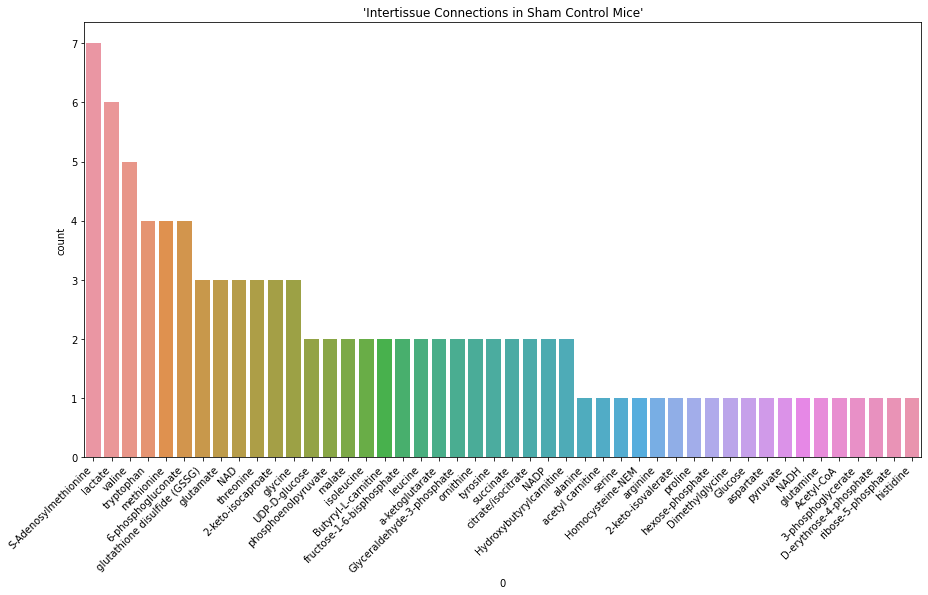

In [92]:
plt.figure(figsize = (15,8))

g = sns.countplot(data=masterinteractions_sham, x=0, order = masterinteractions_sham[0].value_counts().index).set(title="'Intertissue Connections in Sham Control Mice'")
plt.xticks(rotation=45, horizontalalignment='right')
plt.savefig('../figures/metabolomics/sham_intertissue_connections.svg', dpi=300, bbox_inches='tight')

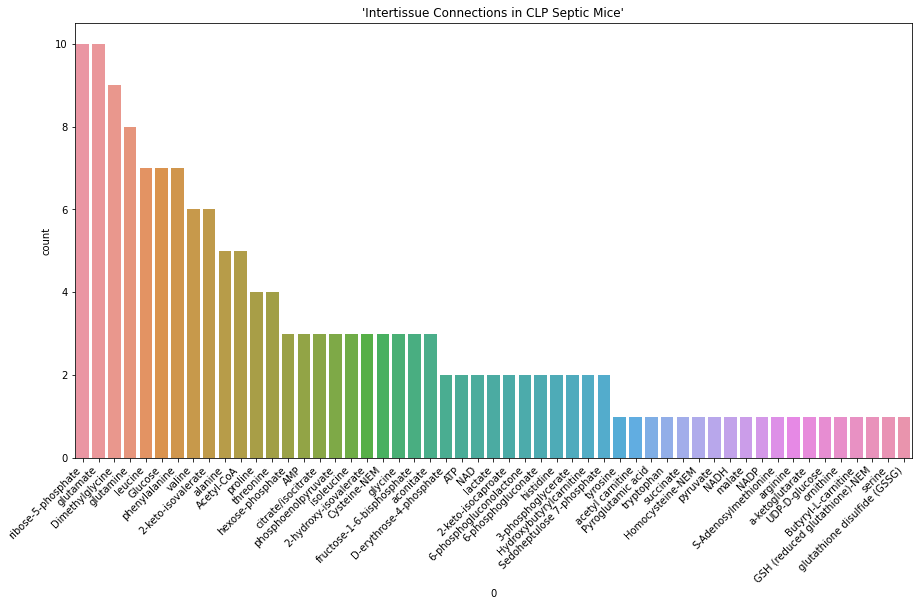

In [93]:
plt.figure(figsize = (15,8))

g = sns.countplot(data=masterinteractions_CLP, x=0, order = masterinteractions_CLP[0].value_counts().index).set(title="'Intertissue Connections in CLP Septic Mice'")
plt.xticks(rotation=45, horizontalalignment='right')
plt.savefig('../figures/metabolomics/clp_intertissue_connections.svg', dpi=300, bbox_inches='tight')